In [152]:
#Limport the important library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## 1. Data Cleaning 


In [153]:
#import the given data set of uber 
Uber = pd.read_csv("C:/Users/Anupam Mishra/Downloads/Uber Request Data.csv")
Uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [154]:
Uber['Request timestamp']=Uber['Request timestamp'].astype(str)
Uber['Request timestamp']=Uber['Request timestamp'].str.replace('/','-')
Uber['Request timestamp']=pd.to_datetime(Uber['Request timestamp'],dayfirst=True)
Uber['Drop timestamp']=pd.to_datetime(Uber['Drop timestamp'],dayfirst=True)
Uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [155]:
#inspection of dataset
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [156]:
Uber.shape

(6745, 6)

In [157]:
Uber.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [158]:
Uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [159]:
dup_chk = Uber["Request id"].duplicated()
dup_chk.sum()

0

In [160]:
#check the null values of Drivers id
Uber[np.isnan(Uber['Driver id'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT
4096,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT
4097,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT
4098,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT
4099,7,Airport,NaN,No Cars Available,2016-07-11 00:30:00,NaT
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [161]:
Uber['Driver id'] = Uber[['Driver id']].fillna(0).astype(int)
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          6745 non-null   int32         
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 289.9+ KB


In [162]:
Uber[np.isnat(Uber['Drop timestamp'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,1,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,1,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,1,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,2,Cancelled,2016-07-12 19:14:00,NaT
...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,NaT


In [163]:
Uber = Uber.drop(['Drop timestamp'], axis=1) 

In [164]:
round(100*(Uber.isnull().sum()/len(Uber.index)), 2)

Request id           0.0
Pickup point         0.0
Driver id            0.0
Status               0.0
Request timestamp    0.0
dtype: float64

In [165]:
Uber['Request hour'] = Uber['Request timestamp'].apply(lambda x: x.strftime('%H'))
Uber['Request hour'] =  Uber['Request hour'].astype(int)
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8


- Binning Into Time Categories

In [166]:
def timeslot(x):
    if x >= 4 and x < 8:
        return 'Early Morning'
    elif x >= 8 and x < 12:
        return 'Morning'
    elif x >= 12 and x < 16:
        return 'Afternoon'
    elif x >= 16 and x < 20:
        return 'Evening'
    elif x >= 20:
        return 'Night'
    elif x >= 0 and x < 4:
        return 'Late Night'
    
Uber['Request timeslot'] = Uber['Request hour'].apply(timeslot)
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning


In [168]:
Uber['Request dayofweek'] = Uber['Request timestamp'].dt.day_name()
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request dayofweek
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday


##  2. Data Analysis

### Univariate Analysis

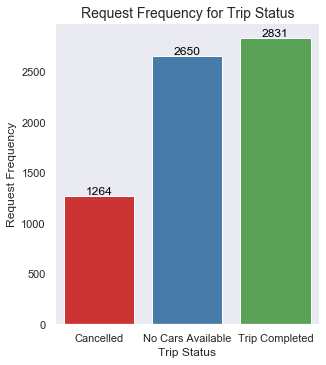

In [169]:

order_status = Uber['Status'].sort_values(ascending = True).unique().tolist()
plot = sns.catplot(x="Status", kind="count", data=Uber, palette="Set1", aspect= .9, order=order_status);

plt.title('Request Frequency for Trip Status', fontsize = 14)
plt.xlabel("Trip Status", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', 
             va='bottom')

plt.show()

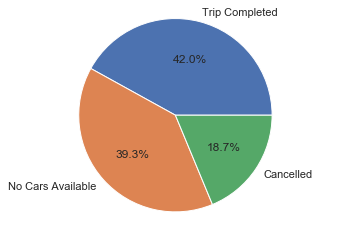

In [170]:
Uber.loc[(Uber.Status =="Trip Completed"),'TripComp'] =1
Uber.loc[(Uber.Status =="No Cars Available"),'NoCars'] =1
Uber.loc[(Uber.Status =="Cancelled"),'Cancel'] =1


labels = ['Trip Completed', 'No Cars Available', 'Cancelled']
sizes = [Uber['TripComp'].value_counts()[1],
         Uber['NoCars'].value_counts()[1],
         Uber['Cancel'].value_counts()[1],
         ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()

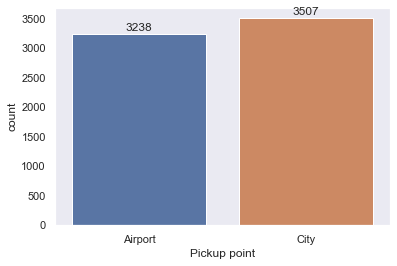

In [171]:
sns.set(style="dark")
ax = sns.countplot(x="Pickup point", data=Uber)
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+50
    ax.text(X, Y, value, ha="center")
plt.show()

### Bivariate Analysis

In [172]:
Uber.groupby(['Status','Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

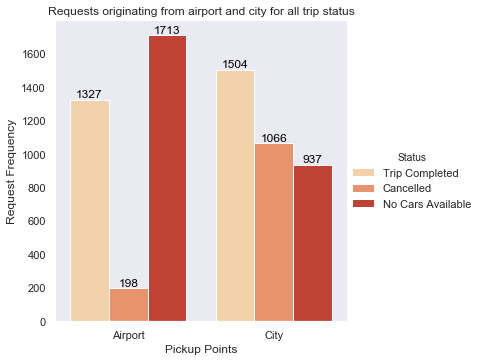

In [173]:
plot = sns.catplot(x="Pickup point", hue="Status", palette='OrRd', kind="count", data=Uber);

plt.title('Requests originating from airport and city for all trip status', fontsize = 12)
plt.xlabel("Pickup Points", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)

# Printing the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', 
             va='bottom')

plt.show()

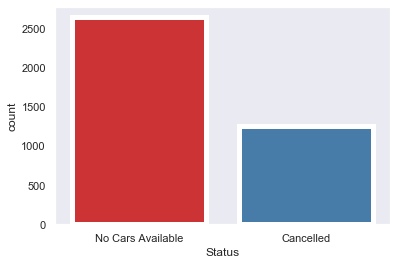

In [174]:
sns.countplot(x="Status", palette="Set1", linewidth=5, data=Uber[Uber.Status != 'Trip Completed'], 
              order = ['No Cars Available','Cancelled'])

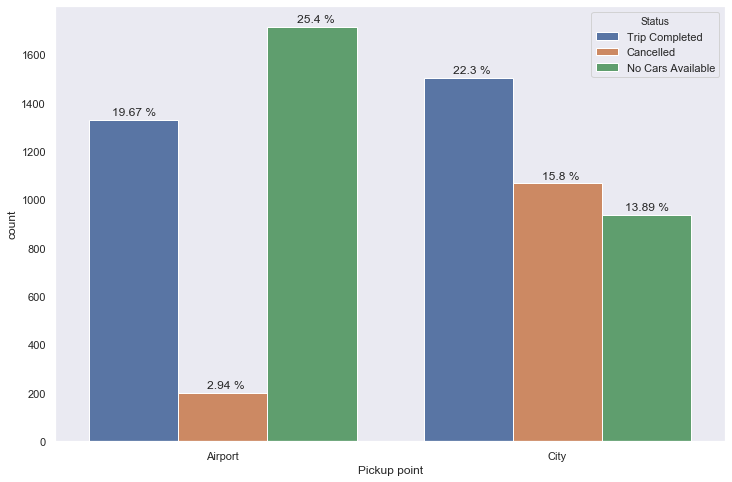

In [175]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Pickup point', hue="Status", data=Uber)
total = len(Uber)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.2
    Y = p.get_height()+20
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()


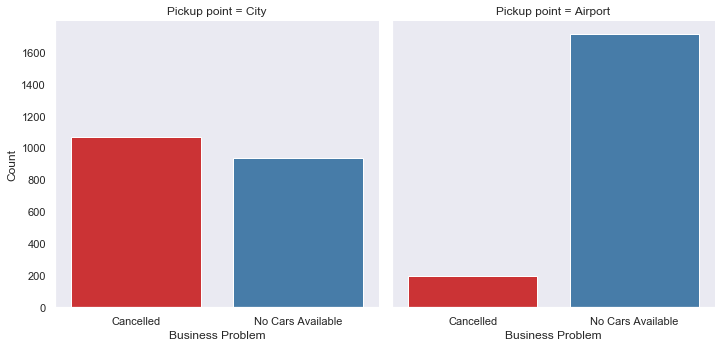

In [176]:
g = sns.catplot(x="Status",col="Pickup point",kind="count", palette="Set1", data=Uber[Uber.Status != 'Trip Completed'])
g.set_axis_labels("Business Problem" ,"Count")

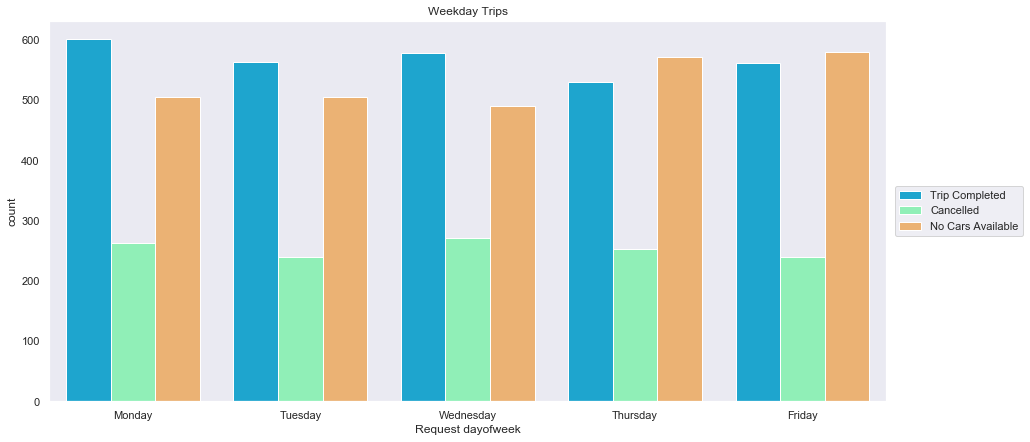

In [177]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Weekday Trips")
ax = sns.countplot(x="Request dayofweek",hue='Status',data=Uber,palette='rainbow')
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')


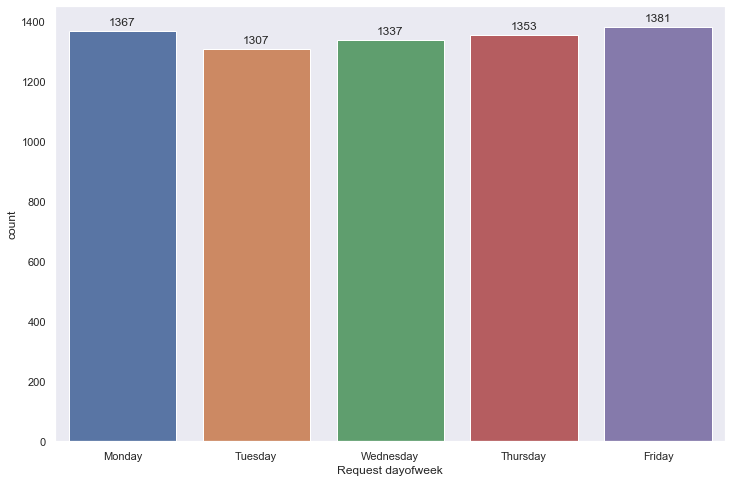

In [178]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Request dayofweek', data=Uber)
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+20
    ax.text(X, Y, value, ha="center")
plt.show()

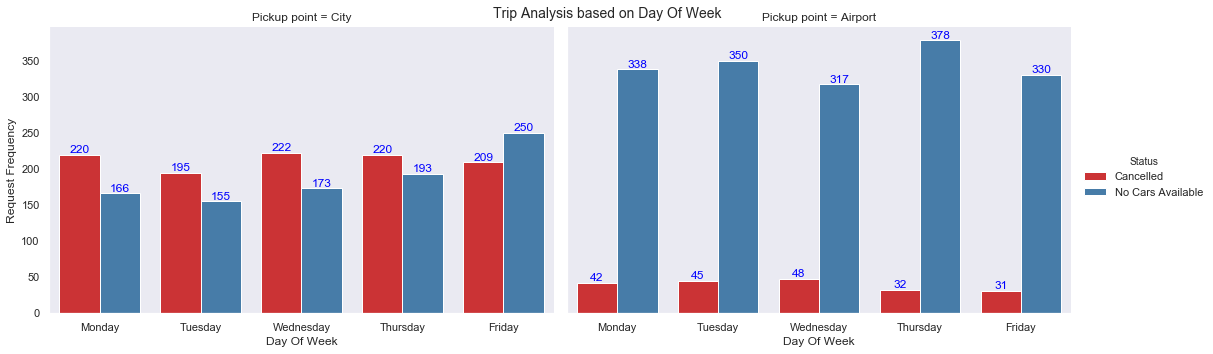

In [179]:
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday']

filter_trip_status_df = Uber[(Uber['Status'] == 'Cancelled') | (Uber['Status'] == 'No Cars Available')]

plot = sns.catplot(x="Request dayofweek", col= 'Pickup point', hue="Status", palette='Set1', kind="count", 
                   data=filter_trip_status_df, aspect=1.5, order=order_days);

plot.fig.suptitle('Trip Analysis based on Day Of Week', fontsize=14)
plot.set_xlabels('Day Of Week', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)

# printing the counts

for i in np.arange(2):
    ax = plot.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', 
                 va='bottom')

plt.show()

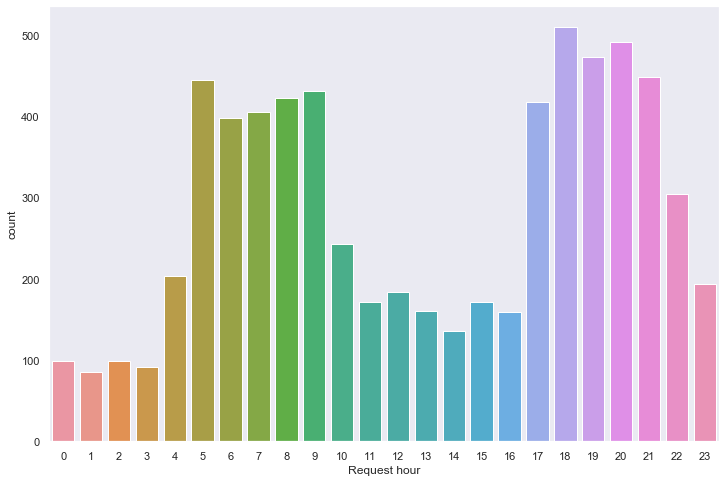

In [180]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='Request hour', data=Uber)
plt.show()

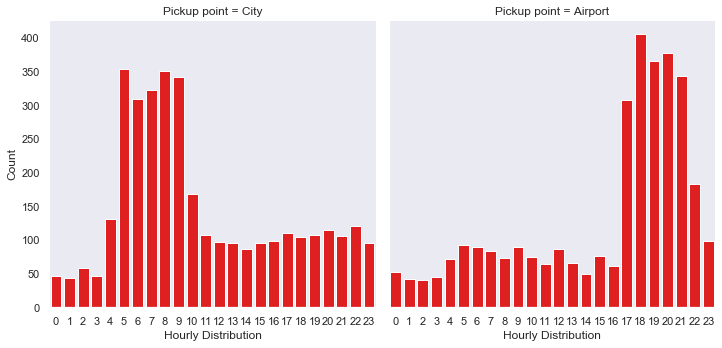

In [120]:
g=sns.catplot(x="Request hour",col="Pickup point",kind="count",col_order = ['City','Airport'],
              palette=sns.color_palette(['red']),
              data=Uber)
g.set_axis_labels("Hourly Distribution" ,"Count")

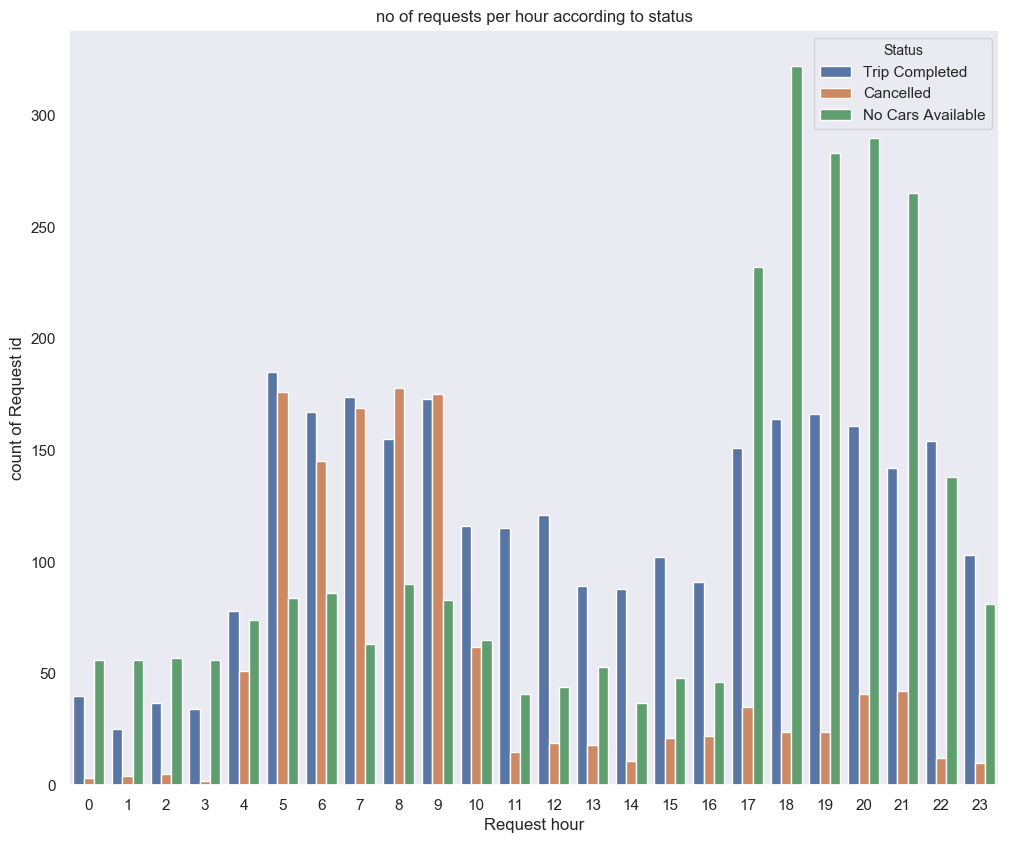

In [121]:
plt.figure(figsize=(12,10),dpi=100,facecolor='w',edgecolor='k')
sns.barplot(x='Request hour',y='Request id',hue='Status',data=Uber,estimator=len)
plt.title("no of requests per hour according to status")
plt.ylabel("count of Request id")
plt.show()

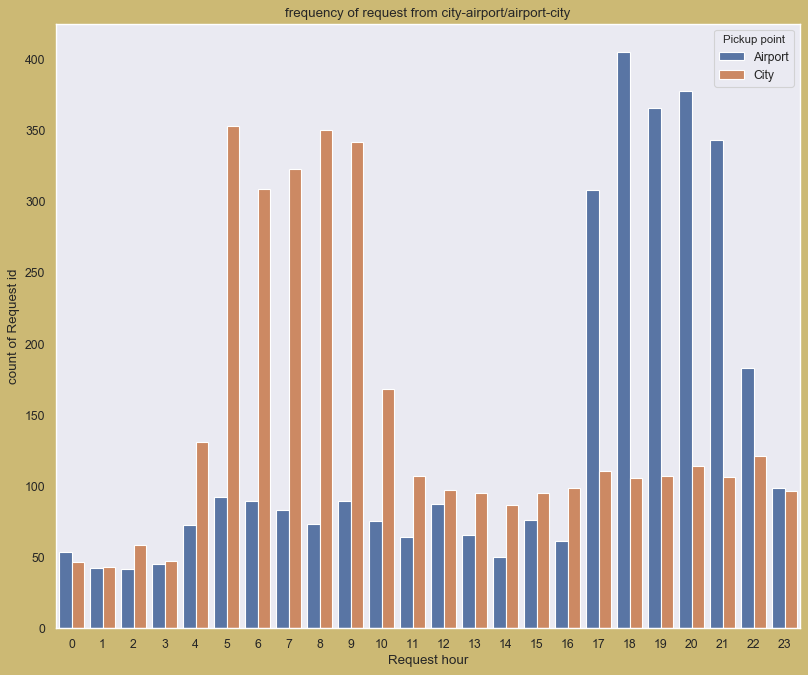

In [122]:
plt.figure(figsize=(12,10),dpi=80,facecolor='y',edgecolor='k')
sns.barplot(x='Request hour', y='Request id', hue='Pickup point',data=Uber, estimator=len)
plt.title("frequency of request from city-airport/airport-city")
plt.ylabel("count of Request id")
plt.show()

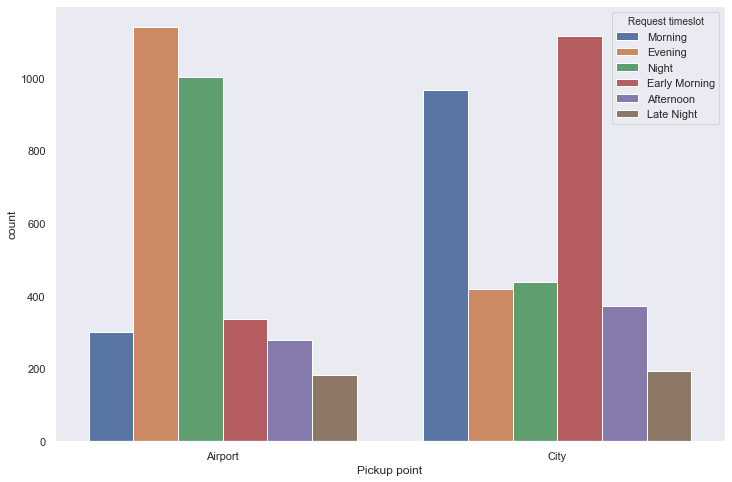

In [90]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='Pickup point', hue="Request timeslot", data=Uber)
plt.show()

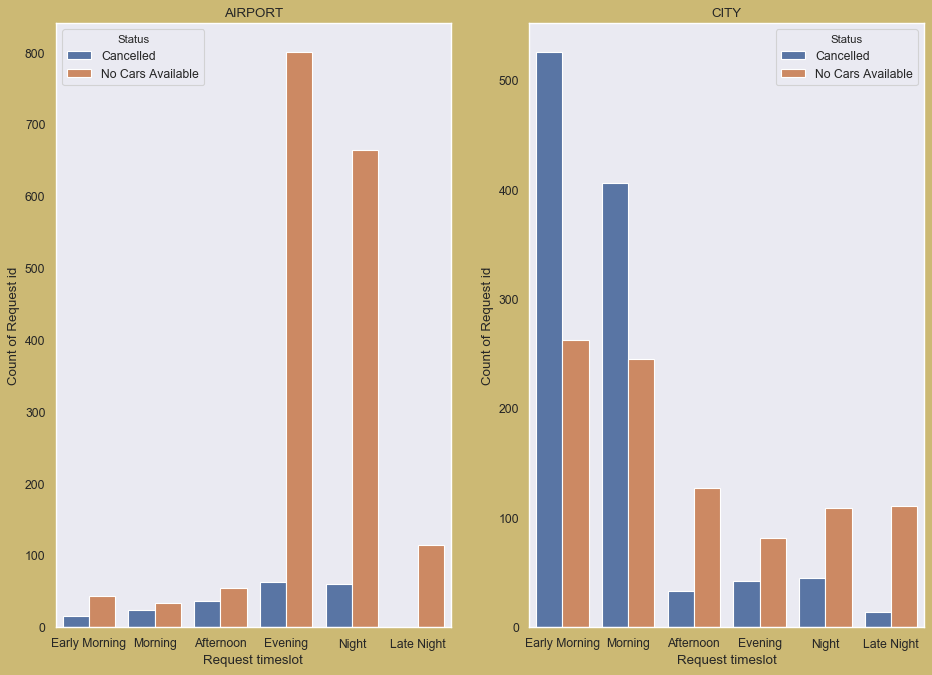

In [86]:
order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
plt.figure(figsize=(14,10),dpi=80,facecolor='y',edgecolor='k')
plt.subplot(1,2,1)
sns.barplot(x='Request timeslot',y='Request id',hue='Status',data=Uber[(Uber['Pickup point']=='Airport')&
(Uber['Status']!='Trip Completed')],estimator=len,order = order_timeslot)
plt.title("AIRPORT")
plt.ylabel("Count of Request id")


plt.subplot(1,2,2)
sns.barplot(x='Request timeslot',y='Request id',hue='Status',data=Uber[(Uber['Pickup point']=='City')&
(Uber['Status']!='Trip Completed')],estimator=len, order = order_timeslot)
plt.title("CITY")
plt.ylabel("Count of Request id")
plt.show()

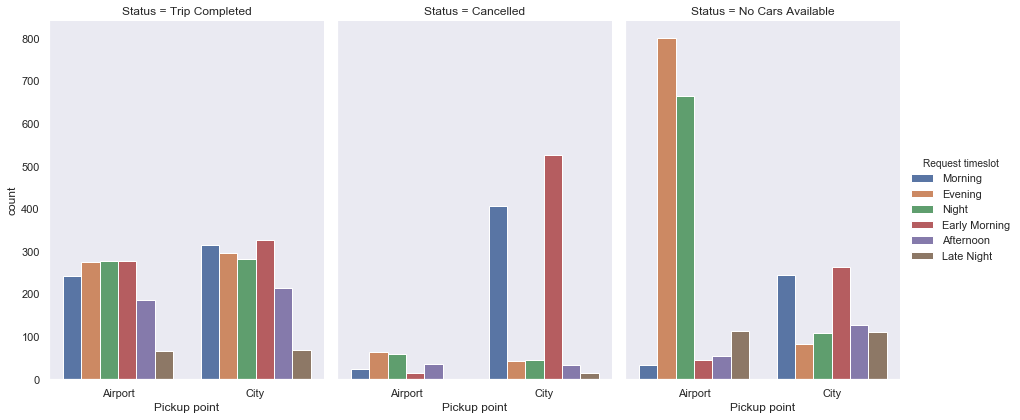

In [91]:
sns.catplot(x='Pickup point',col="Status", hue = 'Request timeslot',data=Uber ,kind="count",
            height=6,aspect= 0.7,ci=85,col_wrap=3,margin_titles=True)
plt.show()

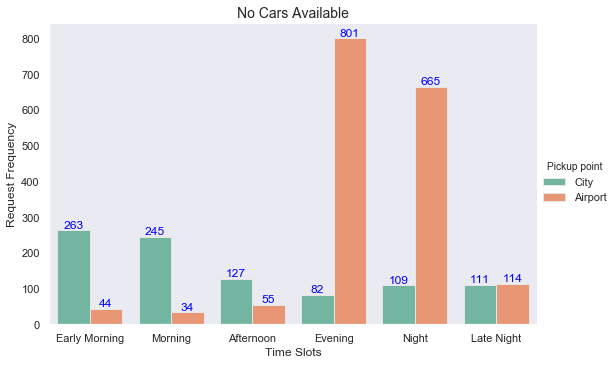

In [123]:
no_cars_available_df = Uber[(Uber['Status'] == 'No Cars Available')]

plot = sns.catplot(x="Request timeslot", hue="Pickup point", kind="count", palette="Set2", edgecolor=".9", aspect = 1.5, 
            data=no_cars_available_df, order = order_timeslot)

plt.title('No Cars Available', fontsize = 14)
plt.ylabel('Request Frequency', fontsize = 12)
plt.xlabel('Time Slots', fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

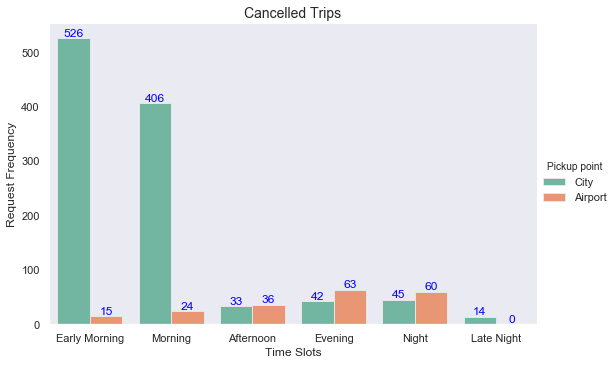

In [124]:
order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

cancelled_df = Uber[(Uber['Status'] == 'Cancelled')]

plot = sns.catplot(x="Request timeslot", hue="Pickup point", kind="count", palette="Set2", edgecolor=".9", aspect=1.5, 
            data=cancelled_df, order = order_timeslot);
plt.title('Cancelled Trips', fontsize = 14)
plt.ylabel("Request Frequency", fontsize = 12)
plt.xlabel("Time Slots", fontsize = 12)

# printing the count

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

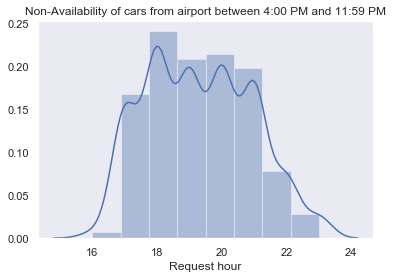

In [125]:
evening_unavailable_cars_df = no_cars_available_df[(((no_cars_available_df['Request timeslot'] == 'Evening') 
                                                     | (no_cars_available_df['Request timeslot'] == 'Night')) 
                                                    & (no_cars_available_df['Pickup point'] == 'Airport'))]
plt.title('Non-Availability of cars from airport between 4:00 PM and 11:59 PM') 
sns.distplot(evening_unavailable_cars_df['Request hour'], bins=8) 
plt.show()

In [126]:
Uber.loc[(Uber.Status == 'Trip Completed') | (Uber.Status == 'Cancelled')| (Uber.Status == 'No Cars Available'), 'demand'] = 'Demand' 

In [127]:
Uber.loc[(Uber.Status == 'Trip Completed'), 'supply'] = 'Supply'

In [130]:
Uber.loc[(Uber.Status == 'Cancelled')| (Uber.Status == 'No Cars Available'), 'gap'] = 'Gap' 

In [131]:
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request dayofweek,TripComp,NoCars,Cancel,demand,supply,gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,Demand,Supply,NaN
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,Demand,Supply,NaN
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,Demand,Supply,NaN


In [132]:
Uber_SupplyandDemand = pd.DataFrame([Uber.demand,Uber.supply,Uber.gap]).transpose()
Uber_SupplyandDemand.head()

,demand,supply,gap
0,Demand,Supply,NaN
1,Demand,Supply,NaN
2,Demand,Supply,NaN
3,Demand,Supply,NaN
4,Demand,Supply,NaN


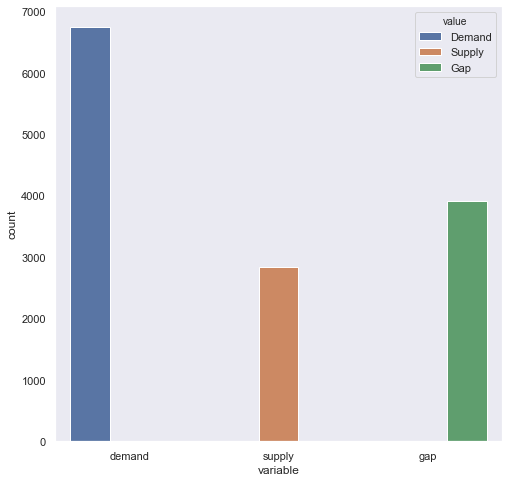

In [43]:
plt.figure(num=None, figsize=(8, 8), facecolor='w', edgecolor='k')
sns.countplot(x="variable",hue="value", data=pd.melt(Uber_SupplyandDemand))
plt.show()

In [136]:
def setSupplyorSupplyDemandGap(x):
    if x == 'Trip Completed':
        return 'Supply'
    else:       
        return 'Supply demand gap'
    
Uber['Supply demand gap'] = Uber['Status'].apply(setSupplyorSupplyDemandGap)
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request dayofweek,TripComp,NoCars,Cancel,demand,supply,gap,Supply demand gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,Demand,Supply,NaN,Supply


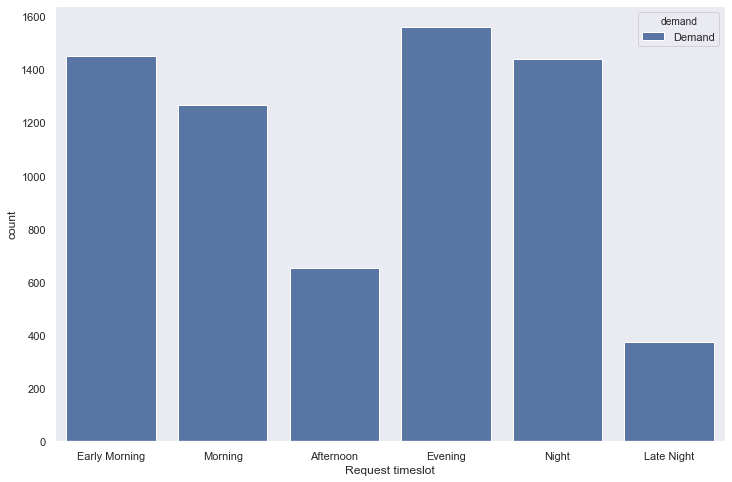

In [137]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(hue='demand',x="Request timeslot", data=Uber,order=order_timeslot)
plt.show()

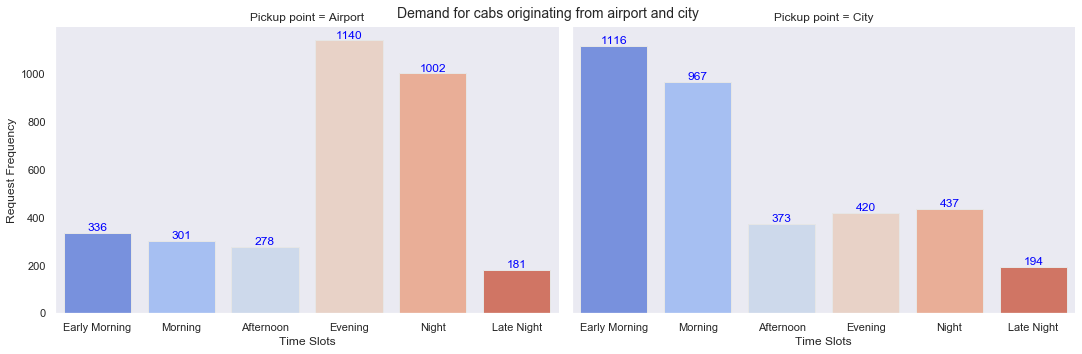

In [138]:
plot = sns.catplot(x='Request timeslot', col="Pickup point", kind="count", palette="coolwarm", edgecolor=".9", aspect = 1.5, 
          data=Uber, order = order_timeslot)

plot.fig.suptitle('Demand for cabs originating from airport and city', fontsize=14)
plot.set_xlabels('Time Slots', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)

# printing the counts

for i in np.arange(2):
    ax = plot.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', 
                 va='bottom')

plt.show()

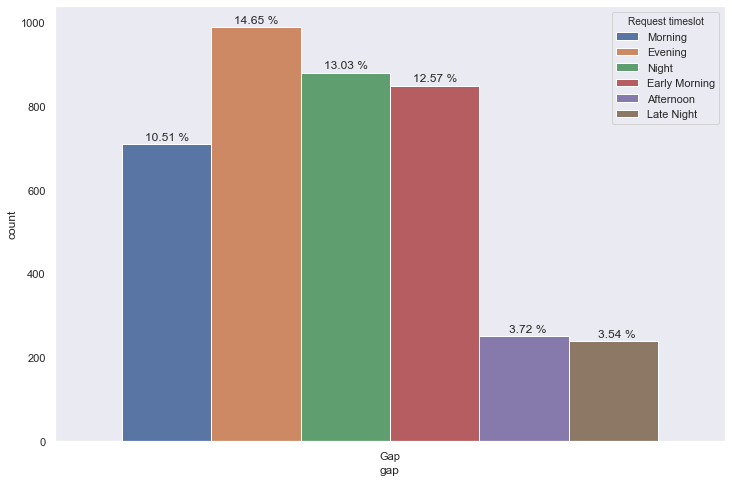

In [146]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='gap',hue="Request timeslot", data=Uber,)
total = len(Uber['gap'])
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.1
    Y = p.get_height()+10
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()

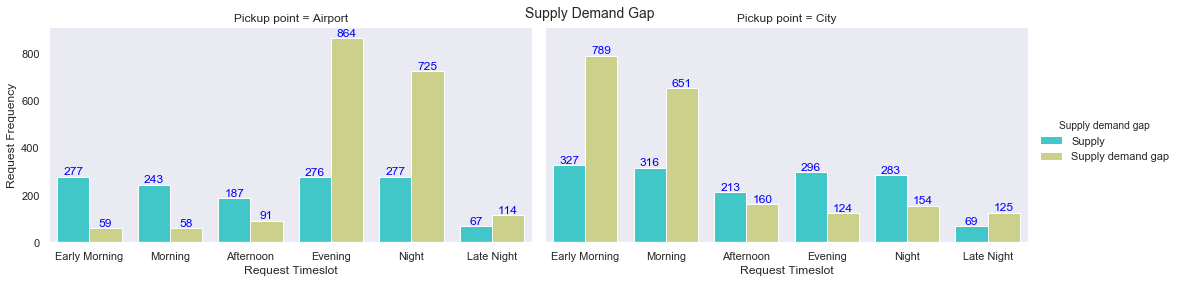

In [148]:
plot = sns.catplot(x="Request timeslot", hue="Supply demand gap", col = 'Pickup point', data=Uber, palette='rainbow', 
            kind="count", height=4, aspect = 1.8, order = order_timeslot);

plot.fig.suptitle('Supply Demand Gap', fontsize=14)
plot.set_xlabels('Request Timeslot', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)

# printing the count

for i in np.arange(2):
    ax = plot.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', 
                 va='bottom')
        
plt.show()

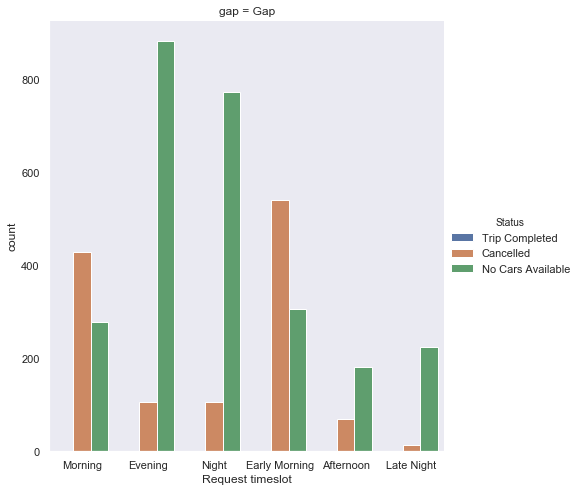

In [149]:
sns.catplot(x='Request timeslot',col="gap", hue = 'Status',data=Uber ,kind="count", height=7,aspect= 0.9,ci=85)
plt.show()

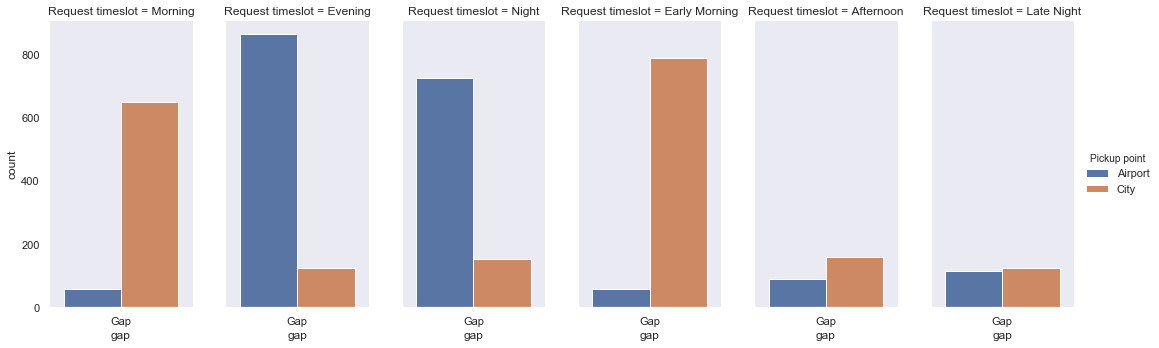

In [63]:
sns.catplot(x='gap',col="Request timeslot", hue = 'Pickup point',data=Uber ,kind="count", height=5,aspect= 0.5,
            ci=85)
plt.show()

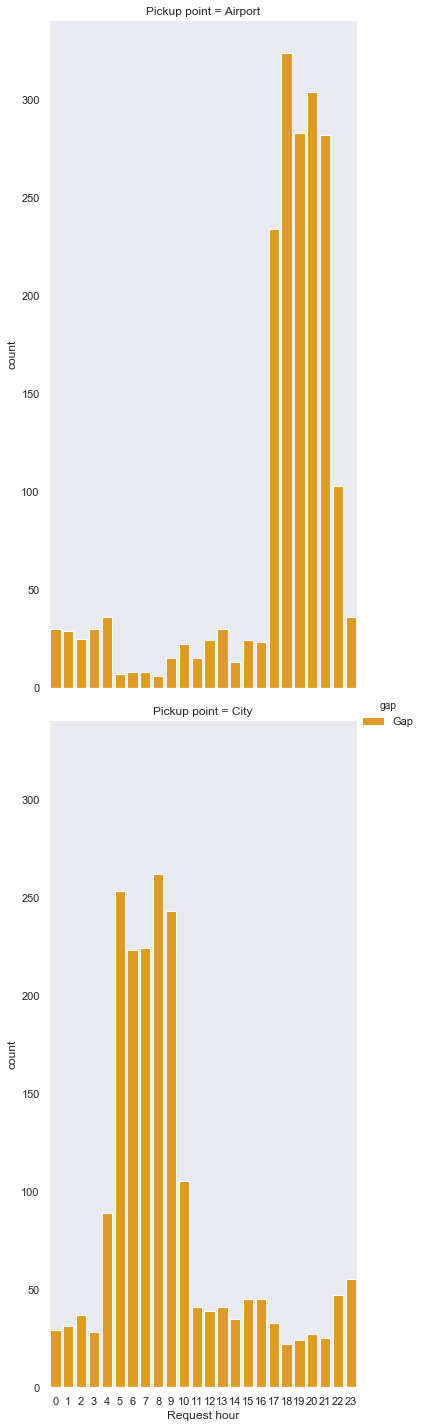

In [65]:
sns.catplot(x='Request hour',col="Pickup point", hue = 'gap',data=Uber ,kind="count", height=10,aspect= 0.5,
            ci=85,col_wrap=1,palette=sns.color_palette(['orange']))
plt.show()

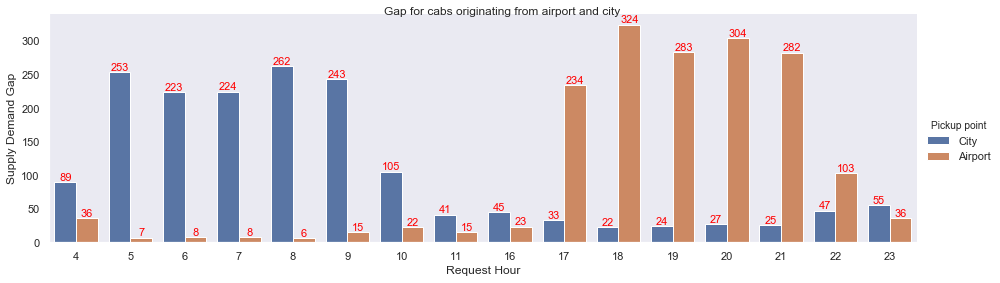

In [150]:
most_severe_gap_df = Uber[((Uber['Request timeslot'] == 'Evening') |
                           (Uber['Request timeslot'] == 'Night') | 
                           (Uber['Request timeslot'] == 'Early Morning') | 
                           (Uber['Request timeslot'] == 'Morning')) & 
                          (Uber['Supply demand gap'] == 'Supply demand gap')] 

plot = sns.catplot(x="Request hour", hue="Pickup point", data=most_severe_gap_df, kind="count", 
            height=4, aspect = 3.2)

plot.fig.suptitle('Gap for cabs originating from airport and city', fontsize=12)
plot.set_xlabels('Request Hour', fontsize=12)
plot.set_ylabels('Supply Demand Gap', fontsize=12)

# printing the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=11, color='red', ha='center', va='bottom')

plt.show()